In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data

In [3]:
from datasets import *
from preprocess import *
from functions import *
import pywt

In [13]:
import torch

In [99]:
x_shape = dataset.input_shape
gk = RFFKernel(x_shape[1], D=20, metric='rbf', gamma=0.5)
laplace_kernel = RFFKernel(x_shape[1], D=20, metric='laplace')

In [112]:
x = dataset[0][0][0]
x

tensor([[-0.8289, -0.5383, -0.1611,  0.2421,  0.6063,  0.8729,  0.9989,  0.9640,
          0.7739,  0.4592],
        [-0.5383, -0.1611,  0.2421,  0.6063,  0.8729,  0.9989,  0.9640,  0.7739,
          0.4592,  0.0705],
        [-0.1611,  0.2421,  0.6063,  0.8729,  0.9989,  0.9640,  0.7739,  0.4592,
          0.0705, -0.3295],
        [ 0.2421,  0.6063,  0.8729,  0.9989,  0.9640,  0.7739,  0.4592,  0.0705,
         -0.3295, -0.6765],
        [ 0.6063,  0.8729,  0.9989,  0.9640,  0.7739,  0.4592,  0.0705, -0.3295,
         -0.6765, -0.9145],
        [ 0.8729,  0.9989,  0.9640,  0.7739,  0.4592,  0.0705, -0.3295, -0.6765,
         -0.9145, -1.0052],
        [ 0.9989,  0.9640,  0.7739,  0.4592,  0.0705, -0.3295, -0.6765, -0.9145,
         -1.0052, -0.9341],
        [ 0.9640,  0.7739,  0.4592,  0.0705, -0.3295, -0.6765, -0.9145, -1.0052,
         -0.9341, -0.7125],
        [ 0.7739,  0.4592,  0.0705, -0.3295, -0.6765, -0.9145, -1.0052, -0.9341,
         -0.7125, -0.3762],
        [ 0.4592,  

In [113]:
y = gk(x)
y

tensor([[-3.1562e-01, -2.5077e-01,  1.0157e-02, -1.1738e-01,  3.0780e-01,
          1.7384e-01,  2.0180e-01,  2.8982e-01, -2.9025e-01, -1.4837e-01,
         -2.5429e-01,  1.3556e-02,  7.9166e-02, -2.8369e-01, -7.6583e-03,
         -3.9732e-02,  3.1141e-01,  2.7555e-01, -3.0463e-01, -2.9936e-01],
        [-2.6627e-01, -2.2645e-01, -1.2395e-01, -6.0795e-02,  3.1623e-01,
          3.0655e-01, -9.0282e-02,  2.6600e-01,  7.0318e-02, -3.0173e-01,
         -2.7760e-01,  5.4473e-02,  2.6621e-01, -1.5227e-02,  2.5232e-01,
          2.1564e-01,  2.9283e-01,  2.3403e-01, -2.2914e-01,  1.3073e-01],
        [-2.5002e-02,  2.6796e-01, -3.1599e-01,  8.6634e-02,  2.2541e-01,
          2.7243e-01, -2.6113e-01,  3.4227e-02,  3.0583e-01, -3.1618e-01,
         -2.2306e-01,  1.5944e-01,  3.0483e-01,  3.0273e-01,  2.9062e-01,
          2.1486e-01,  2.7172e-01,  2.1021e-01, -1.2515e-01,  6.4701e-02],
        [ 2.8303e-01,  7.2467e-02,  9.8751e-03,  2.5846e-01, -2.4215e-01,
          1.0646e-01, -2.9951e-01, 

In [115]:
gk(y, inv=True)

tensor([[-0.5838, -1.2012,  0.1132,  0.8411, -0.1991,  0.1332, -0.4310,  1.0577,
         -0.7899, -0.4626],
        [-0.6134, -1.3401,  0.2050,  0.8201, -0.3161, -0.3543, -0.3959,  0.9858,
         -0.4240, -0.6150],
        [-0.7900, -1.4391,  0.0444,  0.6594, -0.6125, -0.6140, -0.0320,  1.2835,
         -0.4404, -0.6273],
        [-0.6668, -1.1206, -0.1878,  0.6068, -0.6141, -0.1590, -0.2218,  0.9472,
         -0.5630, -0.7433],
        [-0.3282, -0.6490, -0.2849,  0.8083, -0.0857,  0.1018, -0.7066,  0.4129,
         -0.3206, -0.9360],
        [-0.3010, -0.8322, -0.2807,  0.4517, -0.0067, -0.3343, -0.6528,  0.8105,
         -0.3601, -0.4061],
        [-0.4958, -0.7980, -0.1354,  0.1133, -0.0128, -0.2391, -0.5526,  1.1657,
         -1.0689, -0.1937],
        [-0.5559, -0.8051,  0.0422,  0.5860,  0.1614,  0.2512, -0.4921,  1.0384,
         -1.0026, -0.3145],
        [-0.5902, -1.3031,  0.1346,  0.9012, -0.2852,  0.0717, -0.4200,  1.0737,
         -0.7385, -0.5208],
        [-0.6358, -

In [121]:
2*np.pi*torch.rand((5,), dtype=torch.double)

tensor([2.4257, 0.3037, 3.9096, 5.5431, 2.2963], dtype=torch.float64)

computation takes  0.9699685573577881  seconds.


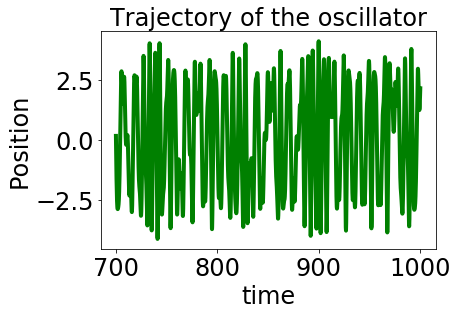

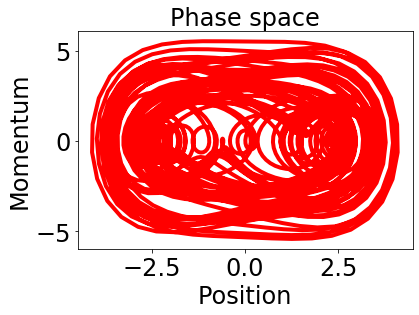

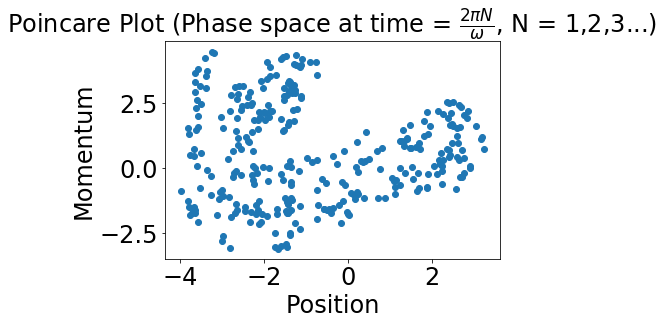

In [18]:
X = duffing(1000, 5, 50)

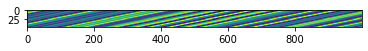

In [19]:
plt.imshow(X[:1000].T)